In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import random
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CrawlShopee/datanewT9.csv')
df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5
2,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5
3,145732557281395,19368582377,12448328811,0,619022569,819825987,819839778.0,roncy7,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","áo không giống mẫu, mỏng nhìn xiyeen thấu, phả...",3
4,134326722200490,19368582377,11255766627,1,619022569,104376388,104374908.0,t*****4,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo vải mịn mịn sờ thích cực, vải mềm, nên mua ...",5
...,...,...,...,...,...,...,...,...,...,...,...,...
25920,150570620279851,22643304874,12931221534,-1,985059108,507623272,507603693.0,5*****0,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,XL","Màu sắc:vàng\n\nHàng không chất lượng , váy rấ...",1
25921,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3
25922,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2
25923,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925 entries, 0 to 25924
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderid          25925 non-null  int64  
 1   itemid           25925 non-null  int64  
 2   cmtid            25925 non-null  int64  
 3   rating           25925 non-null  int64  
 4   shopid           25925 non-null  int64  
 5   userid           25925 non-null  int64  
 6   author_shopid    25925 non-null  float64
 7   author_username  25925 non-null  object 
 8   name_product     25925 non-null  object 
 9   model_product    22055 non-null  object 
 10  comment          25925 non-null  object 
 11  rating_star      25925 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.4+ MB


In [ ]:
df.describe()

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,rating_star
count,2.592500e+04,2.592500e+04,2.592500e+04,25925.000000,2.592500e+04,2.592500e+04,2.592500e+04,25925.000000
mean,1.302008e+14,1.656481e+10,1.082724e+10,0.734349,3.514652e+08,4.665176e+08,4.664846e+08,4.349740
std,2.007641e+13,6.177142e+09,2.047045e+09,0.606230,2.966609e+08,3.461309e+08,3.460905e+08,1.260933
min,1.939941e+09,2.722834e+09,1.640189e+09,-1.000000,4.286270e+05,1.513000e+04,1.513000e+04,1.000000
25%,1.232696e+14,1.221766e+10,1.025394e+10,1.000000,9.530326e+07,1.227985e+08,1.227967e+08,4.000000
50%,1.374694e+14,1.906161e+10,1.154773e+10,1.000000,2.766561e+08,4.239515e+08,4.239320e+08,5.000000
75%,1.444357e+14,2.157643e+10,1.222970e+10,1.000000,5.187153e+08,7.979876e+08,7.980038e+08,5.000000
max,1.541578e+14,2.395096e+10,1.331437e+10,1.000000,1.073965e+09,1.119127e+09,1.118839e+09,5.000000


In [ ]:
df.nunique()

orderid            25771
itemid               278
cmtid              25885
rating                 3
shopid               151
userid             24705
author_shopid      24705
author_username    20333
name_product         902
model_product       1143
comment            24729
rating_star            5
dtype: int64

In [7]:
df = df.drop_duplicates()
df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star,sentiment,label
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5,1,POSITIVE
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5,1,POSITIVE
2,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5,1,POSITIVE
3,145732557281395,19368582377,12448328811,0,619022569,819825987,819839778.0,roncy7,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","áo không giống mẫu, mỏng nhìn xiyeen thấu, phả...",3,0,NEGATIVE
4,134326722200490,19368582377,11255766627,1,619022569,104376388,104374908.0,t*****4,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo vải mịn mịn sờ thích cực, vải mềm, nên mua ...",5,1,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25920,150570620279851,22643304874,12931221534,-1,985059108,507623272,507603693.0,5*****0,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,XL","Màu sắc:vàng\n\nHàng không chất lượng , váy rấ...",1,0,NEGATIVE
25921,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3,0,NEGATIVE
25922,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2,0,NEGATIVE
25923,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4,1,POSITIVE


In [ ]:
# df.drop(columns=['rating','status'], axis=1)

In [ ]:
# random_sample = df[df["rating_star"] == 5].sample(n=1000)
# df = df.drop(random_sample['orderid'].index)
# df = df.reset_index(drop=True)
# df

In [ ]:
df['rating_star'].value_counts().sort_index(ascending=False)

5    19079
4     2165
3     1497
2      914
1     2230
Name: rating_star, dtype: int64

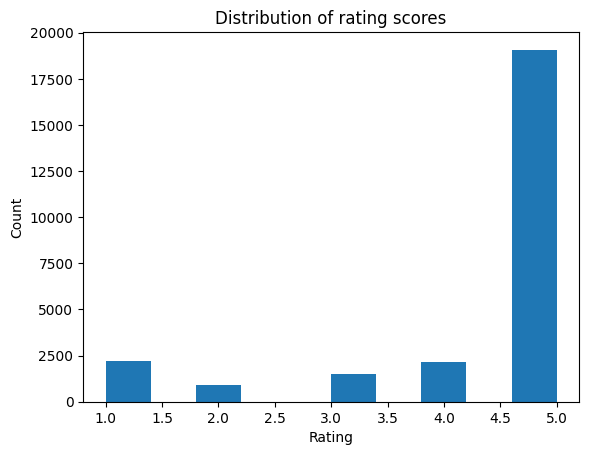

In [ ]:
# distribution of rating
plt.hist(df['rating_star'])
plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

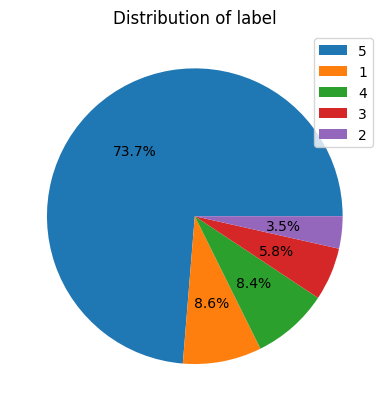

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# import underthesea
# from unidecode import unidecode
dt = df['rating_star'].value_counts()
labels = dt.index.tolist()

plt.pie(dt, autopct = '%0.1f%%')
plt.legend(labels)
plt.title('Distribution of label')
plt.show()

In [ ]:
# '''
# Rating:
#   1: 5 star + 4 star
#   0: 3 star + 2 star
#   -1: 1 star

# '''
# df['rating'].value_counts().sort_index(ascending=False)

In [ ]:
# plt.figure(figsize = (8, 8))

# colors = ['#189AB4', 'green', 'red'] # danh sách màu sắc tương ứng với các nhãn
# labels = ['1','0','-1'] # danh sách nhãn tương ứng với các giá trị của df['rating_star']
# plt.pie(df['rating'].value_counts(),colors=colors, autopct='%0.1f%%')

# plt.title('Distribution of rating', size=14, y=-0.01)
# plt.legend(labels, ncol=1, loc=1)
# plt.show()

In [4]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

label = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
df['sentiment'] = df['rating_star'].map(sentiment)
df['label'] = df['sentiment'].map(label)

df

,orderid,itemid,cmtid,rating,shopid,userid,author_shopid,author_username,name_product,model_product,comment,rating_star,sentiment,label
0,130512743233902,19368582377,10923842087,1,619022569,924107842,924026393.0,dz0j4p7f3c,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Hồng,Một cỡ",Người đẹp vì lụa :))\nNch là áo đẹp nhưng hơi ...,5,1,POSITIVE
1,131512583279711,19368582377,10981575306,1,619022569,196407014,196404054.0,banhquybietboi,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo khá đẹp, tui m68 55kg mặc kiểu fit ý chứ ko...",5,1,POSITIVE
2,135194696261487,19368582377,11331226939,1,619022569,691714262,691694677.0,ngannbede,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ",Đúng với mô tả:chacws z\nMàu sắc:hoiw ngà\nChấ...,5,1,POSITIVE
3,145732557281395,19368582377,12448328811,0,619022569,819825987,819839778.0,roncy7,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","áo không giống mẫu, mỏng nhìn xiyeen thấu, phả...",3,0,NEGATIVE
4,134326722200490,19368582377,11255766627,1,619022569,104376388,104374908.0,t*****4,Áo sơ mi XINLANYASHE chống nắng tay dài cổ chữ...,"Quả mơ,Một cỡ","Áo vải mịn mịn sờ thích cực, vải mềm, nên mua ...",5,1,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25920,150570620279851,22643304874,12931221534,-1,985059108,507623272,507603693.0,5*****0,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,XL","Màu sắc:vàng\n\nHàng không chất lượng , váy rấ...",1,0,NEGATIVE
25921,139366146252345,22643304874,11721882437,0,985059108,389521462,389501885.0,anhhfdjn,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,S",Chất liệu:vải voan\nĐúng với mô tả:màu khác\nM...,3,0,NEGATIVE
25922,145682693252144,22643304874,12399413776,0,985059108,783939311,783955558.0,8j_62v11v7,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Chất liệu:dep\nĐúng với mô tả:dung\nMàu sắc:ko...,2,0,NEGATIVE
25923,143030115240111,22643304874,12076175410,1,985059108,2333602,2332323.0,beebeauty.20.20,Chic váy nữ Đầm Body Cho thời váy trang hàng c...,"Màu vàng,L",Giống mẫu nhưng chất thì hơi mỏng nhé các ty,4,1,POSITIVE


In [8]:
df['sentiment'].value_counts()

1    21244
0     4641
Name: sentiment, dtype: int64

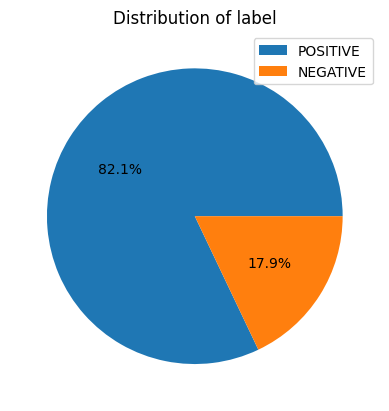

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# import underthesea
# from unidecode import unidecode
dt = df['label'].value_counts()
labels = dt.index.tolist()

plt.pie(dt, autopct = '%0.1f%%')
plt.legend(labels)
plt.title('Distribution of label')
plt.show()

In [ ]:
# get all used words
all_words = pd.Series(' '.join(df['comment']).split())

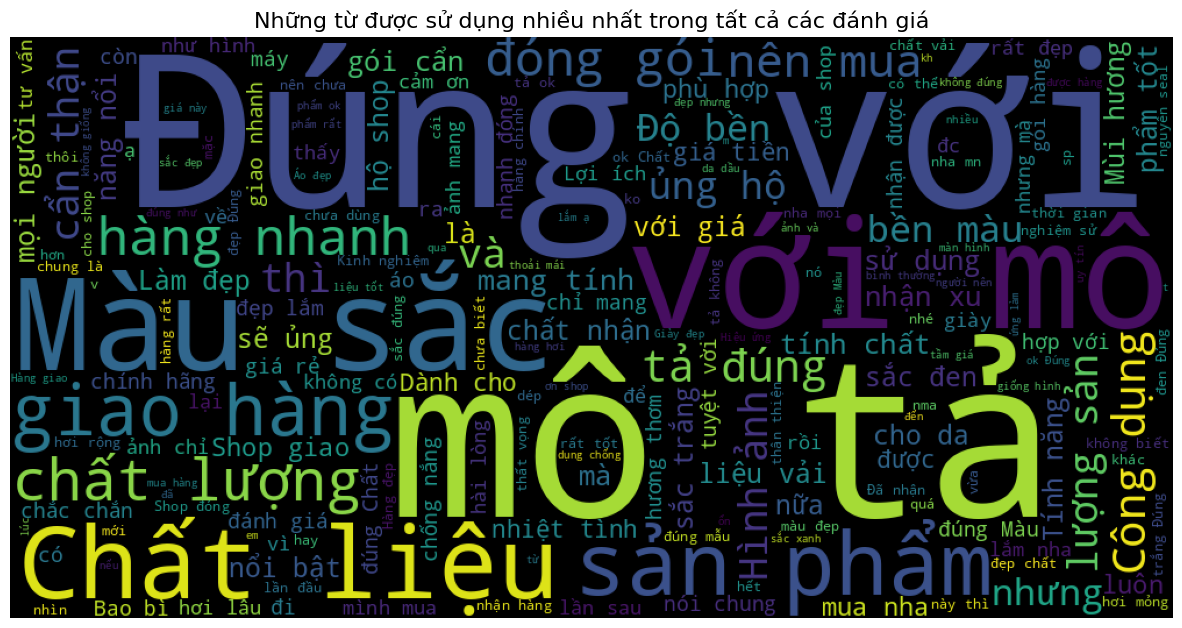

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong tất cả các đánh giá", size=16)

plt.axis("off")
plt.show()

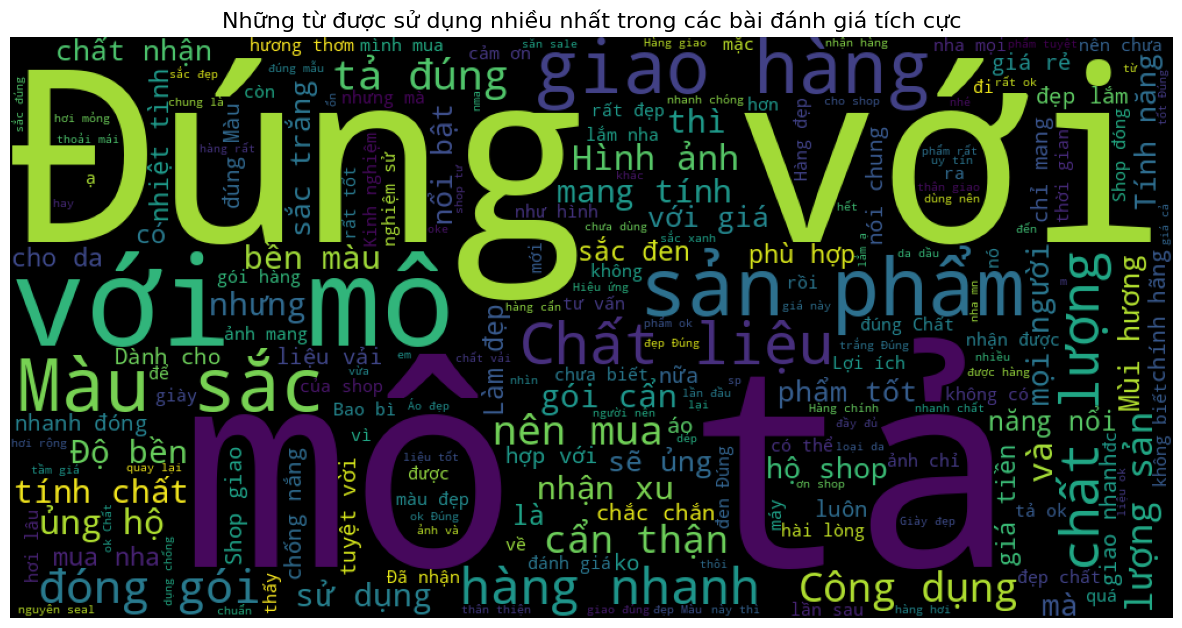

In [ ]:
'''Positive review'''
positiveWords = pd.Series(' '.join(df[df['label']=='POSITIVE']['comment']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong các bài đánh giá tích cực", size=16)

plt.axis("off")
plt.show()

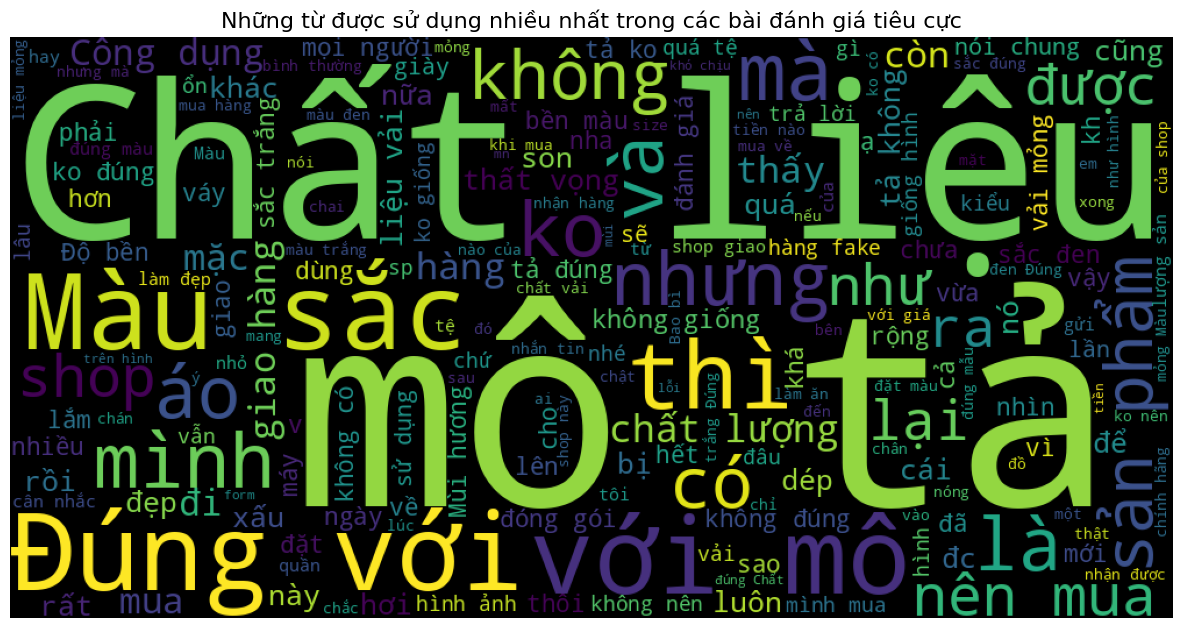

In [ ]:
'''Negative review'''
positiveWords = pd.Series(' '.join(df[df['label']=='NEGATIVE']['comment']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong các bài đánh giá tiêu cực", size=16)

plt.axis("off")
plt.show()

# Clean data

In [ ]:
import re
# remove special character
def special_character(text):
    # text = re.sub(r'\d+', lambda m: " ", text)
    # text = re.sub(r'\b(\w+)\s+\1\b',' ', text) #remove duplicate number word
    text = re.sub("[~!@#$%^&*()_+{}“”|:\"<>?`´\-=[\]\;\\\/.,]", " ", text)
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
special_character(input())

Hello :< Minh la @Diem?>


'Hello Minh la Diem'

In [ ]:
# normalize repeated characters
def repeated_character(text):
    text = re.sub(r'(\w)\1+', r'\1', text)
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
# remove mention tag and hashtag
def tag(text):
    text = re.sub(r"(?:\@|\#|\://)\S+", " ", text)
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
# Remove url
def url(text):
    text = re.sub(r'https?://\S+|www\.\S+', ' ', str(text))
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
# remove email
def mail(text):
    text = re.sub(r"(?:\@|\.//)\S+", " ", text)
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
"""Remove all mixed words and numbers"""
def mixed_word_number(text):
    text = ' '.join(s for s in text.split() if not any(c.isdigit() for c in s))
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
mixed_word_number(input())

hom nay la t5 t cao 1m55 danh gia 5 sao


'hom nay la t cao danh gia sao'

In [ ]:
# Remove emoji and emoticons
def remove_emoji(text):
    for emot in UNICODE_EMOJI:
        text = str(text).replace(emot, ' ')
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
# tokenize by lib Pyvi
!pip install emot
!pip install pyvi
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from pyvi import ViTokenizer, ViPosTagger, ViUtils
def tokenize(text):
    text = str(text)
    text = ViTokenizer.tokenize(text)
    return text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 984.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 35.3 MB/s eta 0:00:00


In [ ]:
tokenize(input())

Chắc chắn


'Chắc_chắn'

In [ ]:
!unzip /content/drive/MyDrive/teencode_dataset.zip

Archive:  /content/drive/MyDrive/teencode_dataset.zip
   creating: teencode_dataset/
   creating: teencode_dataset/dictionary/
  inflating: teencode_dataset/dictionary/abbreviation_dictionary_vn.xlsx  
  inflating: teencode_dataset/dictionary/abb_dict_normal.xlsx  
  inflating: teencode_dataset/dictionary/abb_dict_special.xlsx  
  inflating: teencode_dataset/dictionary/character2emoji.xlsx  
  inflating: teencode_dataset/dictionary/dev_duplicate_abb_data.xlsx  
  inflating: teencode_dataset/dictionary/emoji2word.xlsx  
  inflating: teencode_dataset/dictionary/test_duplicate_abb_data.xlsx  
  inflating: teencode_dataset/dictionary/train_duplicate_abb_data.xlsx  
   creating: teencode_dataset/model/
  inflating: teencode_dataset/model/abb_model.sav  
  inflating: teencode_dataset/dictionary/vietnamese-stopwords.txt  


In [ ]:

""" emoji """
import os
c2e_path = os.path.join(os.getcwd(), 'teencode_dataset/dictionary/character2emoji.xlsx')
character2emoji = pd.read_excel(c2e_path)  # character to emoji


def convert_character2emoji(text):
    text = str(text)
    for i in range(character2emoji.shape[0]):
        text = text.replace(character2emoji.at[i, 'character'], " " + character2emoji.at[i, 'emoji'] + " ")
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
''''''
e2w_path = os.path.join(os.getcwd(), 'teencode_dataset/dictionary/emoji2word.xlsx')
emoji2word = pd.read_excel(e2w_path)  # emoji to word


def convert_emoji2word(text):
    for i in range(emoji2word.shape[0]):
        text = text.replace(emoji2word.at[i, 'emoji'], " " + emoji2word.at[i, 'word_vn'] + " ")
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
""" abbreviation """
adn_path = os.path.join(os.getcwd(), 'teencode_dataset/dictionary/abb_dict_normal.xlsx')
abb_dict_normal = pd.read_excel(adn_path)


def abbreviation_normal(text):  # len word equal 1
    text = str(text)
    temp = ''
    for word in text.split():
        for i in range(abb_dict_normal.shape[0]):
            if str(abb_dict_normal.at[i, 'abbreviation']) == str(word):
                word = str(abb_dict_normal.at[i, 'meaning'])
        temp = temp + ' ' + word
    text = temp
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
''''''
ads_path = os.path.join(os.getcwd(), 'teencode_dataset/dictionary/abb_dict_special.xlsx')
abb_dict_special = pd.read_excel(ads_path)


def abbreviation_special(text):  # including special character and number
    text = ' ' + str(text) + ' '
    for i in range(abb_dict_special.shape[0]):
        text = text.replace(' ' + abb_dict_special.at[i, 'abbreviation'] + ' ',
                            ' ' + abb_dict_special.at[i, 'meaning'] + ' ')
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
''''''
def special_character_1(text):  # remove dot and comma
    text = re.sub("[.,?!]", " ", text)
    text = re.sub('  +', ' ', text).strip()
    return text

In [ ]:
''''''
def annotations(dataset):
    pos = []
    max_len = 8000
    for i in range(dataset.shape[0]):
        n = len(dataset.at[i, 'cmt'])
        l = [0] * max_len
        s = int(dataset.at[i, 'start_index'])
        e = int(dataset.at[i, 'end_index'])
        for j in range(s, e):
            l[j] = 1
        pos.append(l)
    return pos

In [ ]:
stopwords_path = "/content/teencode_dataset/dictionary/vietnamese-stopwords.txt"
def load_stopwords():
    sw = []
    with open(stopwords_path, encoding='utf-8') as f:
        lines = f.readlines()
    for line in lines:
        sw.append(line.replace("\n",""))
    return sw

In [ ]:
sw = load_stopwords()
!pip install underthesea
import underthesea
def processing_stopwords(text, keep_punct=True):

    line = underthesea.word_tokenize(text)
    #filter stopword
    filter_words = [word for word in line if word not in sw]
    #concat
    line = " ".join(filter_words)
    return tokenize(line)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 41.6 MB/s eta 0:00:00


In [ ]:
test = input()
processing_stopwords(test)

chắc là không đẹp không ngon gì đâu


'không đẹp không ngon'

In [ ]:
i = 0
def preprocessing(text):
    global i
    i += 1
    print(i)
    text = text.lower()
    text = convert_character2emoji(text)
    text = url(text)
    text = mail(text)
    text = tag(text)
    text = special_character_1(text) 
    text = abbreviation_special(text)
    text = convert_character2emoji(text)
    text = remove_emoji(text)
    # text = repeated_character(text)
    text = special_character(text)
    text = abbreviation_normal(text)
    text = processing_stopwords(text)
    return text

In [ ]:
cmt = input()
print(preprocessing(cmt))

Cái shop này kỳ ghê đợt đầu giao hàng thì loại còn được đợt sau giao loại dở ẹc thế sao bán nữa dc. Làm ăn gia dối quá
2
shop kỳ ghê đợt đầu giao hàng được đợt giao dở_ẹc bán được làm_ăn gia dối


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/embeddingPhobert/datahug/data.tsv", sep='\t')
df

,text,labels
0,Giao thiếu 1 bộ móng :)),0
1,Hàng chất siêu đẹp\nGiao hàng nhanh,0
2,siêu dở đồng ý kiến với 1 bạn khác ko ăn được ...,1
3,Son chuẩn giá rẻ ship hàng đúng nhanh mới đặ...,0
4,Ăn cảm giác như mực để lâukhô cứng và dai,1
...,...,...
14473,quá thất vọng so với quảng cáo tiếng quá bélắp...,1
14474,Hàng đẹp chống nước tốt. Nhiệt tình ghê yêu yêu,0
14475,C chủ và nhân viên dễ thương vui vẻ sẽ ủng hộ ...,0
14476,Shop giao hang nhanh. Đóng gói cẩn thận. Tuy c...,0


In [ ]:
sentiment =       {0:1,
                   1:0}

label  =  {0: 'NEG',
             1: 'POS'}


# mapping
df['sentiment'] = df['labels'].map(sentiment)
df['label'] = df['sentiment'].map(label)

df

,text,labels,sentiment,label
0,Giao thiếu 1 bộ móng :)),0,1,POS
1,Hàng chất siêu đẹp\nGiao hàng nhanh,0,1,POS
2,siêu dở đồng ý kiến với 1 bạn khác ko ăn được ...,1,0,NEG
3,Son chuẩn giá rẻ ship hàng đúng nhanh mới đặ...,0,1,POS
4,Ăn cảm giác như mực để lâukhô cứng và dai,1,0,NEG
...,...,...,...,...
14473,quá thất vọng so với quảng cáo tiếng quá bélắp...,1,0,NEG
14474,Hàng đẹp chống nước tốt. Nhiệt tình ghê yêu yêu,0,1,POS
14475,C chủ và nhân viên dễ thương vui vẻ sẽ ủng hộ ...,0,1,POS
14476,Shop giao hang nhanh. Đóng gói cẩn thận. Tuy c...,0,1,POS


In [ ]:
print(df['labels'].value_counts())
print(df['sentiment'].value_counts())


0    8338
1    6140
Name: labels, dtype: int64
1    8338
0    6140
Name: sentiment, dtype: int64


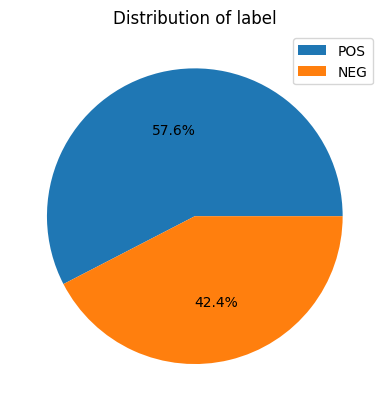

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
# import underthesea
# from unidecode import unidecode
dt = df['label'].value_counts()
labels = dt.index.tolist()

plt.pie(dt, autopct = '%0.1f%%')
plt.legend(labels)
plt.title('Distribution of label')
plt.show()

In [ ]:
df = df[['text','sentiment']]
df[8:19]

,text,sentiment
8,Mình không đánh giá cao về cốt truyện cũng như...,0
9,Cái shop này kỳ ghê đợt đầu giao hàng thì loại...,0
10,Trị mụn tốt mình đắp mỗi ngày và da cx ít tiế...,1
11,Chất lượng sản phẩm kém Không đáng tiền Thời ...,0
12,Ta Chất lượng sản phẩm rất kém bi nát như hột...,0
13,Cái tên: “Ăn nằm với cô đơn” rất hay bìa sách ...,0
14,Chất lượng sản phẩm rất kém. Hàng nhái lại hàn...,0
15,Chất lượng sản phẩm kém pin sài rất kém. mắt đ...,0
16,Hàng giao nhanh. Mình đặt hàng ngày 23 thì ngà...,1
17,Shop phục vụ kémNhân viên giao hàng ko cho...,0


In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)
df

,text,sentiment
0,Giao thiếu 1 bộ móng :)),1
1,Hàng chất siêu đẹp\nGiao hàng nhanh,1
2,siêu dở đồng ý kiến với 1 bạn khác ko ăn được ...,0
3,Son chuẩn giá rẻ ship hàng đúng nhanh mới đặ...,1
4,Ăn cảm giác như mực để lâukhô cứng và dai,0
...,...,...
14473,quá thất vọng so với quảng cáo tiếng quá bélắp...,0
14474,Hàng đẹp chống nước tốt. Nhiệt tình ghê yêu yêu,1
14475,C chủ và nhân viên dễ thương vui vẻ sẽ ủng hộ ...,1
14476,Shop giao hang nhanh. Đóng gói cẩn thận. Tuy c...,1


In [ ]:
df['comment_clean'] = df.text.map(lambda x : preprocessing(x))
df

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
966

,text,sentiment,comment_clean
0,Giao thiếu 1 bộ móng :)),1,giao 1 móng
1,Hàng chất siêu đẹp\nGiao hàng nhanh,1,hàng chất siêu đẹp giao hàng nhanh
2,siêu dở đồng ý kiến với 1 bạn khác ko ăn được ...,0,siêu dở đồng_ý_kiến 1 không ăn được mua 1 2 hộ...
3,Son chuẩn giá rẻ ship hàng đúng nhanh mới đặ...,1,son chuẩn giá rẻ ship hàng đúng nhanh đặt hôm ...
4,Ăn cảm giác như mực để lâukhô cứng và dai,0,ăn cảm_giác như mực lâukhô cứng dai
...,...,...,...
14473,quá thất vọng so với quảng cáo tiếng quá bélắp...,0,thất_vọng quảng_cáo tiếng bélắp ráp cẩu_thả nê...
14474,Hàng đẹp chống nước tốt. Nhiệt tình ghê yêu yêu,1,hàng đẹp chống tốt nhiệt_tình ghê yêu yêu
14475,C chủ và nhân viên dễ thương vui vẻ sẽ ủng hộ ...,1,c chủ_nhân_viên dễ_thương vui_vẻ ủng_hộ
14476,Shop giao hang nhanh. Đóng gói cẩn thận. Tuy c...,1,shop giao hang nhanh đóng_gói cẩn_thận nếm thử...


In [ ]:
df = pd.DataFrame(df)


In [ ]:
df.to_csv("/content/drive/MyDrive/embeddingPhobert/datahug/clean_data.csv")

# get all used words


In [ ]:
# get all used words
all_words = pd.Series(' '.join(df['comment_clean']).split())

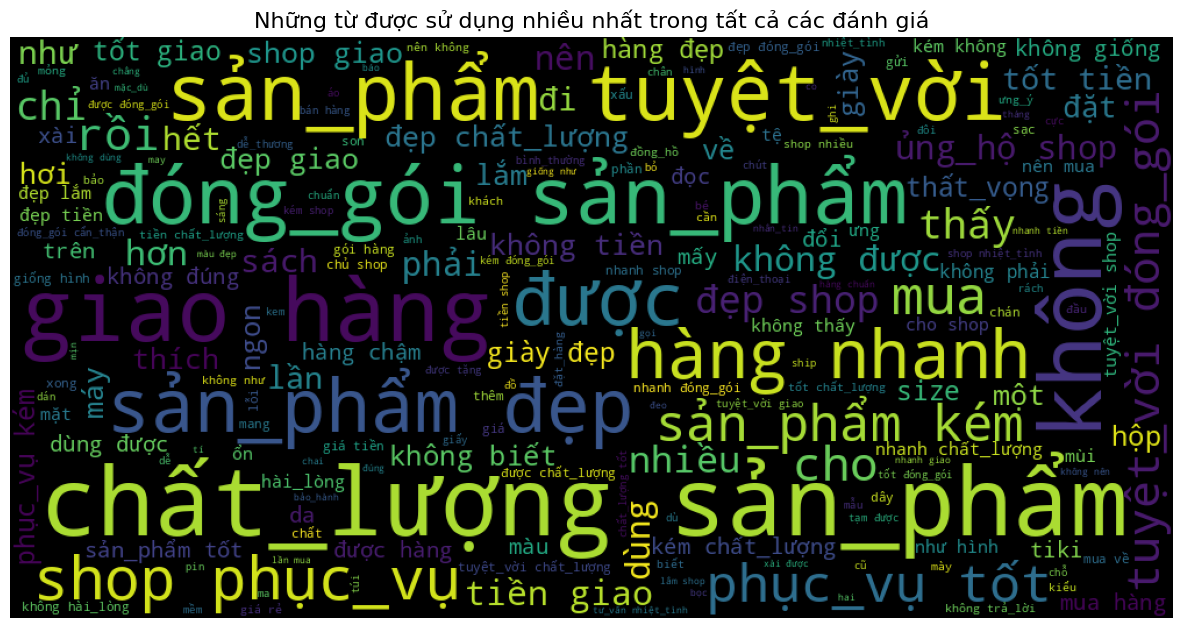

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong tất cả các đánh giá", size=16)

plt.axis("off")
plt.show()

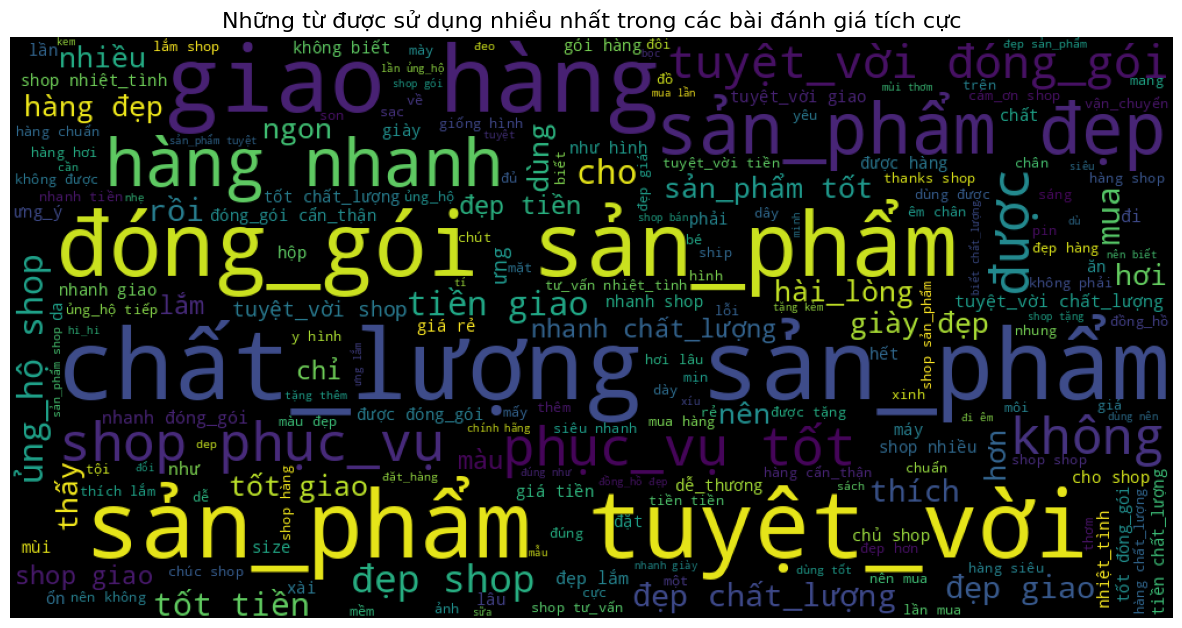

In [ ]:
'''Positive review'''
positiveWords = pd.Series(' '.join(df[df['sentiment']==1]['comment_clean']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong các bài đánh giá tích cực", size=16)

plt.axis("off")
plt.show()

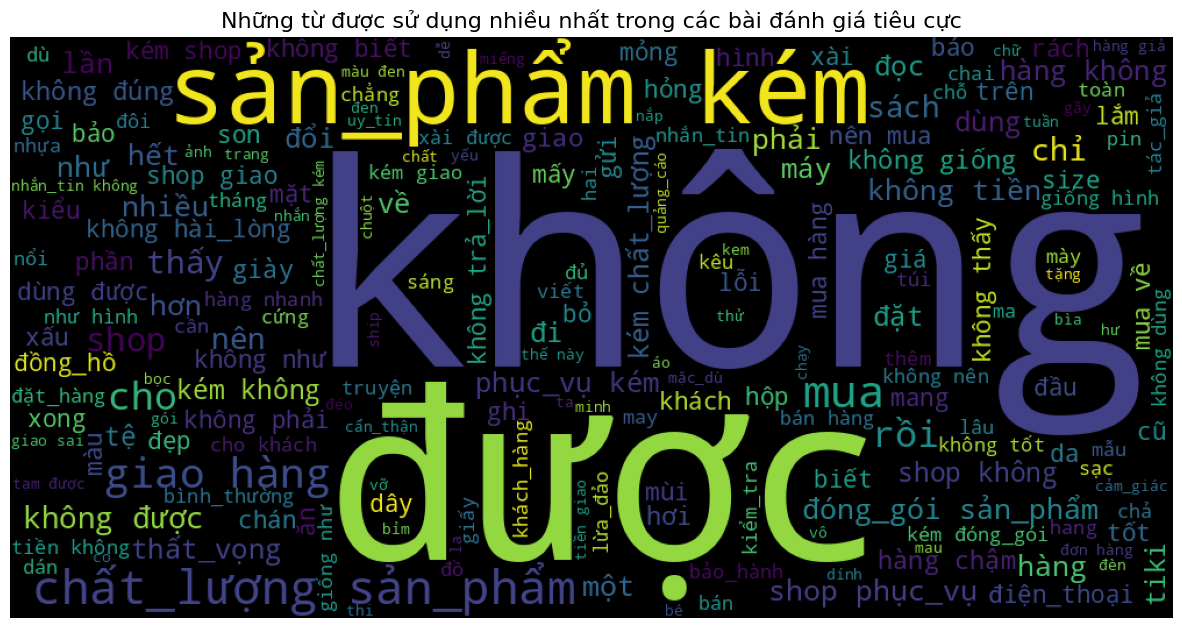

In [ ]:
'''Negative review'''
positiveWords = pd.Series(' '.join(df[df['sentiment']==0]['comment_clean']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Những từ được sử dụng nhiều nhất trong các bài đánh giá tiêu cực", size=16)

plt.axis("off")
plt.show()

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/CrawlShopee/clean_dataT9.csv")
# df = pd.DataFrame(df)
# df1 = df.iloc[70:, 14:]
# df1

,sentiment,comment_clean
70,POSITIVE,sản_phẩm tốt vải đẹp shop đóng_gói cẩn_thận đặ...
71,POSITIVE,chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩ...
72,POSITIVE,vải được áo như hình mua thêm sản_phẩm shop
73,POSITIVE,sản_phẩm_chất_lượng giao hàng nhanh_chóng nên mua
74,NEGATIVE,tệ mẫu không giống ảnh đừng mua áo kia không g...
...,...,...
28493,POSITIVE,shop uy_tín 11 đỉmm
28494,POSITIVE,váy xinh giá được
28495,POSITIVE,xinh
28496,POSITIVE,áo_khoác da bomber kéo khóa ngực chữ gray dài ...
